In [37]:
import warnings
warnings.filterwarnings('ignore')

import os
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score, auc, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette('Set1')
%matplotlib inline

path = os.listdir('../data/')
path

['test.csv', 'train.csv']

In [38]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

print('============= Checking N ====================')
print('Train 데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(train.shape[0], train.shape[1]))
print('Test  데이터는 |{}| 행과 |{}| 열로 구성돼 있습니다.'.format(test.shape[0], test.shape[1]))
print('=============================================')

============= Checking N ====================
Train 데이터는 |891| 행과 |12| 열로 구성돼 있습니다.
Test  데이터는 |418| 행과 |11| 열로 구성돼 있습니다.


In [40]:
# age 평균 사용 : 결과론 적으로 평균을 사용한 모델들이 나머지 보다 전부 좋은 성능을 보여줬습니다.
train.Age = train.Age.fillna(train.Age.mean())

# Pclass
train.Pclass = train.Pclass.astype(np.int64)

# Sex
train.loc[train.Sex =='male', 'Sex'] = 0
train.loc[train.Sex =='female', 'Sex'] = 1
train.Sex = train.Sex.astype(np.int)

# Embarked
train.Embarked = train.Embarked.fillna('S')

train.loc[train.Embarked =='S', 'Embarked'] = 0
train.loc[train.Embarked =='C', 'Embarked'] = 1
train.loc[train.Embarked =='Q', 'Embarked'] = 2
train.Embarked = train.Embarked.astype(np.int)

#featrue selection
y = train.Survived
X = train.drop(['PassengerId','Name','Ticket','Cabin','Survived'], axis=1)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [73]:
dt =DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred = dt.predict(X_test)
(pred == y_test).sum() / y_test.shape[0]

0.74439461883408076

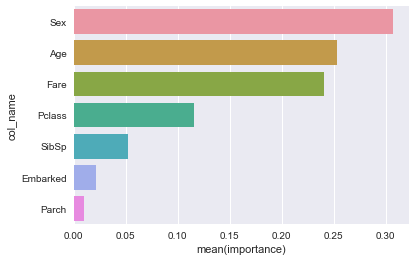

In [80]:
con = pd.DataFrame()
con['col_name'] = X_train.columns
con['importance'] = dt.feature_importances_
con = con.sort_values('importance', ascending=False)
sns.barplot(x = con.importance, y = con.col_name)
plt.show()